In [3]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Specify the encoding when reading the CSV file
df = pd.read_csv("/content/drive/MyDrive/Covid Data.csv.zip");
# Display the first few rows of the DataFrame
df.head()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Axes: >

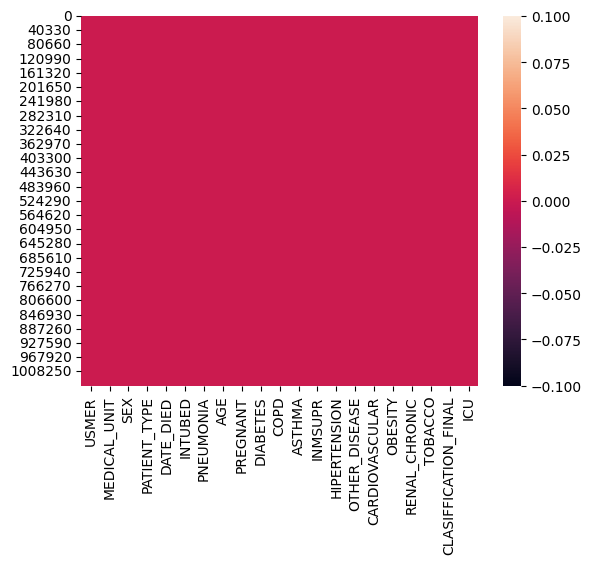

In [5]:
sns.heatmap(df.isnull())

In [ ]:

from sklearn.preprocessing import StandardScaler

# Assuming you have already loaded the DataFrame 'df'

# Check the shape of the DataFrame to understand its structure
print(df.shape)

# Check the column names to verify the presence of "OTHER_DISEASE" and others
print(df.columns)

# Drop columns "OTHER_DISEASE" and others if they exist
if "OTHER_DISEASE" in df.columns:
    df.drop(["OTHER_DISEASE"], axis=1, inplace=True)
    print("Column 'OTHER_DISEASE' dropped.")
else:
    print("Column 'OTHER_DISEASE' not found in DataFrame.")

# Check the column names again
print(df.columns)

# Check if "DIABETES" exists in the DataFrame
if "DIABETES" in df.columns:
    # Replace "B" with 0 and "C" with 1 in the "DIABETES" column
    df["DIABETES"].replace({"B": 0, "C": 1}, inplace=True)
    print("Column 'DIABETES' found and values replaced.")
else:
    print("Column 'DIABETES' not found in DataFrame.")

# Check the column names again
print(df.columns)

# Separate the features (X) and target (y)
if "DIABETES" in df.columns:
    X = df.drop(["DIABETES"], axis=1)
    y = df["DIABETES"]
    print("Features and target separated.")
else:
    print("Cannot separate features and target because 'Diabetes' column is missing.")

# Check for non-numeric columns in X and encode them using one-hot encoding
non_numeric_cols = X.select_dtypes(exclude=["number"]).columns.tolist()
if len(non_numeric_cols) > 0:
    X = pd.get_dummies(X, columns=non_numeric_cols)
    print("Non-numeric columns encoded using one-hot encoding.")

# Standardize the feature data using StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
print("Features standardized.")

# Now you can use x_scaled for further analysis


(1048575, 21)
Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')
Column 'OTHER_DISEASE' dropped.
Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
       'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')
Column 'DIABETES' found and values replaced.
Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
       'CLASIFFICATION_FINAL', 'ICU'],
      dtype='o

In [ ]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,2,2,2,1,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,2,2,2,2,2,2,2,2,7,97


In [ ]:

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Define features (X) and labels (y)
X = df.drop(["DIABETES"], axis=1)
y = df["DIABETES"]

# Encode categorical variables using label encoding
label_encoder = LabelEncoder()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Scale the features (X) before splitting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=0)

# Initialize and train the logistic regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(x_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


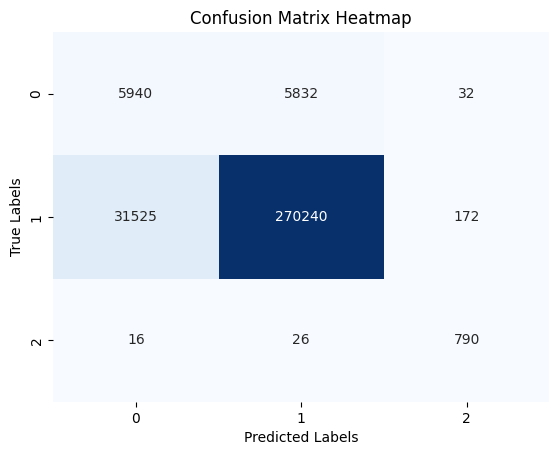

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_pred,y_test)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()